# **Insper - Eletromagnetismo e Ondulatória** #


**Projeto - Vaga carregadora para o carrinho de Acionamentos Elétricos**



In [95]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt


Declarando as variáveis do transformador ($R_1$, $R_2$, $L_1$, $L_2$) e da fonte (frequência e tensão eficaz - Ufonte)

In [96]:
#frequência (Hz)
f = 60

#tensão eficaz (V)
V1 = 12

#dispersão
k = 0.2

#RC
Rcarga = 10

#Rdc
Rdc = 0.5


In [97]:
def CalcularCorrentesEmSerie(Uf, Rdc, Rc, XC, XL, XM):
    Z=np.array([[Rdc+XL+XC, -XM],[-XM, XL+XC+Rdc+Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

def CalcularCorrentesEmParalelo(Uf, Rdc, Rc, XC, XL, XM):
    Z=np.array([[Rdc+XL+XC, -XM],[-XM, (XL+Rdc)+((XC*Rc)/(XC+Rc))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]


Para a capacitância de 0.15 µF
    Indutância: 124.19 µH
Para a capacitância de 0.10 µF
    Indutância: 82.80 µH
Para a capacitância de 0.47 µF
Para a capacitância de 1.00 µF
    Indutância: 20.83 µH
Para a capacitância de 4.70 µF


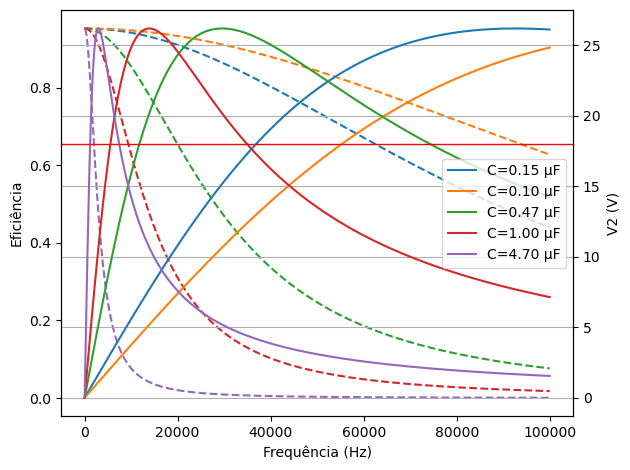

In [98]:

lista_capacitancias = [150*10**(-9), 0.1*10**(-6), 0.47*10**(-6), 10**(-6), 4.7*10**(-6)]

# lista de frequências de ressonância(de 0 a 100kHz)
frequencias = np.linspace(1, 100000, 500)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Frequência (Hz)')
ax1.set_ylabel('Eficiência')

ax2 = ax1.twinx()
ax2.set_ylabel('V2 (V)')

lista_x_pontos = []

# Em série
for C in lista_capacitancias:
    #print(f'Para a capacitância de {C} μF:')

    lista_eficiencia = []
    lista_V2 = []

    print(f'Para a capacitância de {C*1e6:.2f} µF')

    for fr in frequencias:
        w = 2*pi*fr
        L = 1/(w**2*C)
        XL = 1j*w*L
        M = k*L
        XM = 1j*w*M
        XC = 1/(1j*w*C)

        i1, i2 = CalcularCorrentesEmSerie(V1, Rdc, Rcarga, XC, XL, XM)

        V2 = i2*Rcarga
        lista_V2.append(abs(V2))
        
        if (abs(abs(V2) - 18) < 0.01):
            lista_x_pontos.append(fr)
            print(f'    Indutância: {L*1e6:.2f} µH')

        Pot_saida = np.real(V2*i2.conjugate()*(1/2))
        Pot_entrada = np.real(V1*i1.conjugate()*(1/2))

        Eficiencia = Pot_saida/Pot_entrada
        lista_eficiencia.append(Eficiencia)



    ax1.plot(frequencias, lista_eficiencia, "--",)

    ax2.plot(frequencias, lista_V2, label=f'C={C*1e6:.2f} µF')

fig.tight_layout()
ax2.axhline(18, color='red', linewidth=1)
#for x in lista_x_pontos:
#    ax2.axvline(x, color='red', linewidth=1)
plt.legend()
plt.grid()
plt.show()

Para a capacitância de 1.5000000000000002e-07 μF:
Para a capacitância de 1e-07 μF:
Para a capacitância de 4.6999999999999995e-07 μF:
Para a capacitância de 1e-06 μF:
Para a capacitância de 4.7e-06 μF:


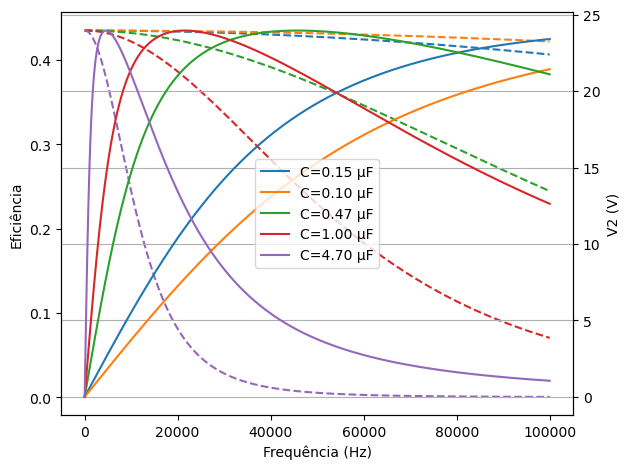

In [99]:

lista_capacitancias = [150*10**(-9), 0.1*10**(-6), 0.47*10**(-6), 10**(-6), 4.7*10**(-6)]

# lista de frequências de ressonância(de 0 a 100kHz)
frequencias = np.linspace(1, 100000, 500)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Frequência (Hz)')
ax1.set_ylabel('Eficiência')

ax2 = ax1.twinx()
ax2.set_ylabel('V2 (V)')

# Em série
for C in lista_capacitancias:
    print(f'Para a capacitância de {C} μF:')

    lista_eficiencia = []
    lista_V2 = []

    for fr in frequencias:
        w = 2*pi*fr
        L = 1/(w**2*C)
        XL = 1j*w*L
        M = k*L
        XM = 1j*w*M
        XC = 1/(1j*w*C)

        i1, i2 = CalcularCorrentesEmParalelo(V1, Rdc, Rcarga, XC, XL, XM)

        V2 = i2*((XC*Rcarga)/(XC+Rcarga))
        lista_V2.append(abs(V2))

        Pot_saida = np.real(V2*i2.conjugate()*(1/2))
        Pot_entrada = np.real(V1*i1.conjugate()*(1/2))

        Eficiencia = Pot_saida/Pot_entrada
        lista_eficiencia.append(Eficiencia)

    ax1.plot(frequencias, lista_eficiencia, "--",)

    ax2.plot(frequencias, lista_V2, label=f'C={C*1e6:.2f} µF')

fig.tight_layout()
ax2.axhline(18, color='blue', linestyle='', linewidth=1)
plt.legend()
plt.grid()
plt.show()

Para o sistema em série, com valores reais:
V2 = 16.39 V
Frequência de ressonância = 50301.10 Hz
Eficiência máxima = 0.85


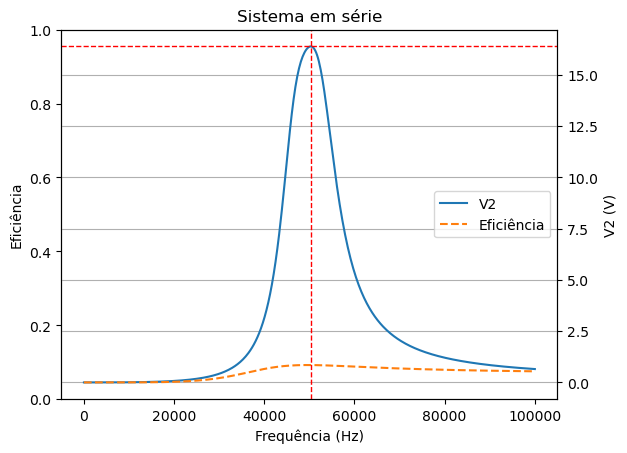

In [100]:
# Decobrir a frequência de ressonância para sistema em série, com valores reais
C = 0.1*10**(-6)
L1 = 103.9e-6
L2 = 108.4e-6
Rf1 = 1.278
Rf2 = 1.262
Rcarga = 10

ks =np.linspace(0, 0.5, 10)
frequencias2 = np.linspace(1, 100000, 500)
lista_V2_2 = []
lista_eficiencia_2 = []

def CalcularCorrentesEmSerie2(Uf, Rf1, Rf2, Rc, XC, XL1, XL2, XM):
    Z=np.array([[Rf1+XL1+XC, -XM],[-XM, XL2+XC+Rf2+Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

for fr in frequencias2:
    w = 2*pi*fr
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    M = k*sqrt(L1*L2)
    XM = 1j*w*M
    XC = 1/(1j*w*C)

    i1, i2 = CalcularCorrentesEmSerie2(V1, Rf1, Rf2, Rcarga, XC, XL1, XL2, XM)

    V2 = i2*Rcarga
    lista_V2_2.append(abs(V2))
    Pot_saida = np.real(V2*i2.conjugate()*(1/2))
    Pot_entrada = np.real(V1*i1.conjugate()*(1/2))

    Eficiencia = Pot_saida/Pot_entrada
    lista_eficiencia_2.append(Eficiencia)


V2_max = max(lista_V2_2)
index = lista_V2_2.index(V2_max)
F_max = frequencias2[index]
Eficiencia_vmax = lista_eficiencia_2[index]

print(f'Para o sistema em série, com valores reais:')
print(f'V2 = {V2_max:.2f} V')
print(f'Frequência de ressonância = {F_max:.2f} Hz')
print(f'Eficiência máxima = {Eficiencia_vmax:.2f}')

fig, ax1 = plt.subplots()
ax1.set_xlabel('Frequência (Hz)')
ax1.set_ylabel('Eficiência')

ax2 = ax1.twinx()
ax2.set_ylabel('V2 (V)')
plt.title('Sistema em série')
plt.plot(frequencias2, lista_V2_2, label='V2')
plt.plot(frequencias2, lista_eficiencia_2, label='Eficiência', linestyle='--')
plt.axvline(F_max, color='red', linestyle='--', linewidth=1)
plt.axhline(V2_max, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.grid()
plt.show()






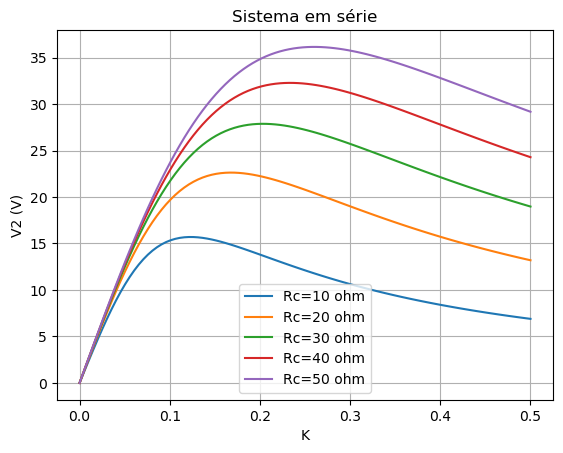

36.143861552239315
0.26262626262626265


In [101]:
# Descobrir o K ideal para o sistema em série utilizando uma frequência de ressonância de 50,1kHz
C = 0.1*10**(-6)
L1 = 103.3e-6
L2 = 108.4e-6
Rf1 = 1.257
Rf2 = 1.257
f = 50100

ks =np.linspace(0, 0.5, 100)


# Realizar lista de Ks para diferentes Rcarga

fig, ax1 = plt.subplots()

for Rcarga in [10, 20, 30, 40, 50]:
    lista_V2_3 = []

    for k in ks:
        XL1 = 1j*2*pi*f*L1
        XL2 = 1j*2*pi*f*L2
        M = k*sqrt(L1*L2)
        XM = 1j*2*pi*f*M
        XC = 1/(1j*2*pi*f*C)

        i1, i2 = CalcularCorrentesEmSerie2(V1, Rf1, Rf2, Rcarga, XC, XL1, XL2, XM)

        V2 = i2*Rcarga
        lista_V2_3.append(abs(V2))

    V2_max = max(lista_V2_3)
    index = lista_V2_3.index(V2_max)
    K_max = ks[index]

    ax1.plot(ks, lista_V2_3, label=f'Rc={Rcarga} ohm')

plt.title('Sistema em série')
plt.xlabel('K')
plt.ylabel('V2 (V)')
plt.legend()
plt.grid()
# Tracar reta do V2 max no grafico de Sistema em série
plt.show()
print(V2_max)
print(K_max)

